In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.rcParams['figure.figsize']= (10.0 ,8.0)
from sklearn.ensemble import RandomForestClassifier

In [2]:
df1 = pd.read_csv("C:\\Users\\Lenovo\\Downloads\\Project_2\\Train_Data\\Train_Data\\Train.csv")
df1.head()

,ID,V2,V5,V6,DrivingStyle
0,DR_24526,1265,10243,2,2
1,DR_30052,1680,30871,6,2
2,DR_40928,936,3224,4,2
3,DR_66033,1503,3315,4,2
4,DR_45266,929,3022,4,2


In [3]:
df2 = pd.read_csv("C:\\Users\\Lenovo\\Downloads\\Project_2\\Train_Data\\Train_Data\\Train_Vehicletravellingdata.csv")
df2.head()

,ID,V1,V3,V4,V7,V8,V9,V10,V11,V18
0,DR_24526,2012-03-21 09:14:55,1,81,57227,87,16986,941,94.0,Dry
1,DR_24526,2012-03-21 09:15:07,1,88,57229,81,1708,551,11.0,Dry
2,DR_24526,2012-03-21 09:15:12,1,88,57230,88,22892,1698,4.0,Dry
3,DR_24526,2012-03-21 09:15:48,2,84,57228,89,1945,544,127.0,Dry
4,DR_24526,2012-03-21 09:15:54,1,89,57231,88,13787,1893,42.0,Dry


In [4]:
df3 = pd.read_csv("C:\\Users\\Lenovo\\Downloads\\Project_2\\Train_Data\\Train_Data\\Train_WeatherData.csv")
df3.head()

,ID,V1,V12,V13,V14,V15,V16,V17,V19
0,DR_24526,2012-03-21 09:14:55,7.0,clear,None,95.0,146.0,1.0,daylight
1,DR_24526,2012-03-21 09:15:07,7.0,clear,None,95.0,124.0,0.0,daylight
2,DR_24526,2012-03-21 09:15:12,7.0,clear,None,95.0,124.0,0.0,daylight
3,DR_24526,2012-03-21 09:15:48,7.0,clear,None,95.0,124.0,0.0,daylight
4,DR_24526,2012-03-21 09:15:54,7.0,clear,None,95.0,124.0,0.0,daylight


In [5]:
df1.columns[df1.isnull().any()]

Index([], dtype='object')

In [6]:
df2.columns[df2.isnull().any()]
#we will impute the missing value ahead

Index(['V11'], dtype='object')

In [7]:
df3.columns[df3.isnull().any()]

Index(['V12', 'V15', 'V16', 'V17'], dtype='object')

create new dataframe where add important features from df2 and df3 to df1
convert categorical variables to numerical ones
find out any missing values and then impute



## Imputing Missing VALUE

In [8]:
df3['V12'].fillna(0,inplace = True)

In [9]:
df3['V15'].fillna(0,inplace = True)

In [10]:
df2['V11'].fillna(0,inplace = True)  # Imputing the missing values

In [11]:
df2.loc[264,:]

ID                DR_21143
V1     2012-03-22 16:06:49
V3                       1
V4                      76
V7                   59018
V8                      86
V9                    3562
V10                   1064
V11                      3
V18                    Dry
Name: 264, dtype: object

## Data Pre-Processing

In [12]:
alldata = df1[:] #cloning is done into a new dataframe
alldata.head()

,ID,V2,V5,V6,DrivingStyle
0,DR_24526,1265,10243,2,2
1,DR_30052,1680,30871,6,2
2,DR_40928,936,3224,4,2
3,DR_66033,1503,3315,4,2
4,DR_45266,929,3022,4,2


In [13]:
alldata.set_index('ID',inplace = True)

In [14]:
df2['Relative_Speed'] = df2['V4']-df2['V8']
series1 = df2.groupby('ID',sort = False , as_index = False)['Relative_Speed'].mean()
series1.head()

,ID,Relative_Speed
0,DR_24526,0.421053
1,DR_30052,-3.818182
2,DR_40928,2.636364
3,DR_66033,-0.909091
4,DR_45266,-0.166667


In [15]:
series1.set_index('ID',inplace = True)
alldata['Mean_Relative_Speed'] = series1['Relative_Speed']

In [55]:
series_meanSpeed = df2.groupby('ID',sort = False, as_index = False)['V4'].mean()
series_meanSpeed.set_index('ID',inplace = True)
series_meanSpeed[0:5]

,V4
ID,
DR_24526,87.473684
DR_30052,82.272727
DR_40928,85.090909
DR_66033,82.818182
DR_45266,82.750000


In [56]:
alldata['V4_mean'] = series_meanSpeed['V4']

In [17]:
#df1.drop(['Mean_Relative_Speed'],axis =1,inplace = True)

In [18]:
series2 = df3.groupby('ID',sort = False, as_index = False)['V12'].agg(pd.Series.mode)
series2.set_index('ID',inplace = True)
series3 = df3.groupby('ID',sort = False, as_index = False)['V15'].agg(pd.Series.mode)
series3.set_index('ID',inplace = True)
series2.head()

,V12
ID,
DR_24526,7
DR_30052,1
DR_40928,1
DR_66033,4
DR_45266,3


In [19]:
series3.head()

,V15
ID,
DR_24526,95
DR_30052,96
DR_40928,95
DR_66033,95
DR_45266,95


In [20]:
alldata['V12'] = series2['V12']
alldata['V15'] = series3['V15']
alldata.head()

,V2,V5,V6,DrivingStyle,Mean_Relative_Speed,V12,V15
ID,,,,,,,
DR_24526,1265,10243,2,2,0.421053,7,95
DR_30052,1680,30871,6,2,-3.818182,1,96
DR_40928,936,3224,4,2,2.636364,1,95
DR_66033,1503,3315,4,2,-0.909091,4,95
DR_45266,929,3022,4,2,-0.166667,3,95


In [21]:
# converting the categorical variables into ordinal variables by mapping with the numbers.
df3["V13"] = df3["V13"].map({ "clear" :0, "rain":1, "snow":2}).astype(int)

In [22]:
df3["V14"].fillna("None",inplace = True)
df3['V14'] = df3['V14'].map({ " ":0, "None":0,"Low":1,"Moderate":2, "High":3}).astype(int)

In [23]:
df3['V19'] = df3['V19'].map({"daylight": 0, "night" : 1, "twilight": 2}).astype(int)
df3.head()

,ID,V1,V12,V13,V14,V15,V16,V17,V19
0,DR_24526,2012-03-21 09:14:55,7.0,0,0,95.0,146.0,1.0,0
1,DR_24526,2012-03-21 09:15:07,7.0,0,0,95.0,124.0,0.0,0
2,DR_24526,2012-03-21 09:15:12,7.0,0,0,95.0,124.0,0.0,0
3,DR_24526,2012-03-21 09:15:48,7.0,0,0,95.0,124.0,0.0,0
4,DR_24526,2012-03-21 09:15:54,7.0,0,0,95.0,124.0,0.0,0


In [24]:
series4 = df3.groupby('ID',sort = False, as_index = False)['V13'].agg(pd.Series.mode)
series4.set_index('ID',inplace = True)
alldata['V13'] = series4['V13']

In [25]:
series5 = df3.groupby('ID',sort = False, as_index = False)['V14'].agg(pd.Series.mode)
series5.set_index('ID',inplace = True)
alldata['V14'] = series5['V14']

series6 = df3.groupby('ID',sort = False, as_index = False)['V19'].agg(pd.Series.mode)
series6.set_index('ID',inplace = True)
alldata['V19'] = series6['V19']

In [57]:
alldata.head()

,V2,V5,V6,DrivingStyle,Mean_Relative_Speed,V12,V15,V13,V14,V19,V3_freq,Avg_V11,V18,V4_mean
ID,,,,,,,,,,,,,,
DR_24526,1265,10243,2,2,0.42,7,95,0,0,0,0.21,67.84,0,87.473684
DR_30052,1680,30871,6,2,-3.82,1,96,0,0,0,0.64,138.36,0,82.272727
DR_40928,936,3224,4,2,2.64,1,95,1,1,0,0.36,159.55,0,85.090909
DR_66033,1503,3315,4,2,-0.91,4,95,0,0,0,0.55,118.45,0,82.818182
DR_45266,929,3022,4,2,-0.17,3,95,0,0,0,0.42,109.50,0,82.750000


#### Finding Frequent LANE CHANGE

In [27]:
# We need to find how frequently the driver is changing lane. Here we have found the number of times the driver has changed
# his lane and then divided by the total records of a particular driver using his driver id given in the dataset df2.\

list1 = df2['ID'].tolist()
list2 = df2['V3'].tolist()
#list3 = []
dict1 = {}

count =0
id_count = 1
a = len(list1)-1 
for i in range(a):
        if (list1[i+1] == list1[i]):
            id_count += 1
            if(list2[i+1] != list2[i]):
                count +=1
            if (i+1 == a):
                print("last1")  # just to check the code if it is running correctly
                dict1[list1[i]] = round((count/id_count),2)
        else :
            dict1[list1[i]] = round((count/id_count),2)
            # list3.append(round((count/id_count),2))
            count = 0
            id_count =1 
        

last1


In [28]:
alldata.shape

(12994, 10)

In [29]:
#Assigning the dictionary dict1 into dataframe
df4 = pd.DataFrame(dict1.values(), index = dict1.keys() )

In [30]:
alldata['V3_freq'] = df4[0]b
alldata.head()

,V2,V5,V6,DrivingStyle,Mean_Relative_Speed,V12,V15,V13,V14,V19,V3_freq
ID,,,,,,,,,,,
DR_24526,1265,10243,2,2,0.421053,7,95,0,0,0,0.21
DR_30052,1680,30871,6,2,-3.818182,1,96,0,0,0,0.64
DR_40928,936,3224,4,2,2.636364,1,95,1,1,0,0.36
DR_66033,1503,3315,4,2,-0.909091,4,95,0,0,0,0.55
DR_45266,929,3022,4,2,-0.166667,3,95,0,0,0,0.42


In [191]:
series_V3 = df2.groupby('ID', sort = False , as_index = False)['V3'].agg(pd.Series.mode)
series_V3.set_index('ID',inplace = True)
alldata['V3'] = series_V3['V3']


In [200]:
alldata.head()

,V2,V5,V6,DrivingStyle,Mean_Relative_Speed,V12,V15,V13,V14,V19,V3_freq,Avg_V11,V18,V4_mean,V3
ID,,,,,,,,,,,,,,,
DR_24526,1265,10243,2,2,0.42,7,95,0,0,0,0.21,67.84,0,87.473684,2
DR_30052,1680,30871,6,2,-3.82,1,96,0,0,0,0.64,138.36,0,82.272727,1
DR_40928,936,3224,4,2,2.64,1,95,1,1,0,0.36,159.55,0,85.090909,2
DR_66033,1503,3315,4,2,-0.91,4,95,0,0,0,0.55,118.45,0,82.818182,1
DR_45266,929,3022,4,2,-0.17,3,95,0,0,0,0.42,109.50,0,82.750000,1


In [31]:
#Now add one more colomn for average time gap for each ID.Here time gap is with the preceding vehicle in seconds
series8 = df2.groupby('ID',sort = False, as_index = False)['V11'].mean()
series8.set_index('ID',inplace = True)

alldata['Avg_V11']= series8['V11']

In [32]:
alldata['Avg_V11'] = round(alldata['Avg_V11'],2)
alldata['Mean_Relative_Speed']= round(alldata['Mean_Relative_Speed'],2)


In [157]:
alldata.head()

,V2,V5,V6,DrivingStyle,Mean_Relative_Speed,V12,V15,V13,V14,V19,V3_freq,Avg_V11,V18,V4_mean,V3
ID,,,,,,,,,,,,,,,
DR_24526,1265,10243,2,2,0.42,7,95,0,0,0,0.21,67.84,0,87.473684,2
DR_30052,1680,30871,6,2,-3.82,1,96,0,0,0,0.64,138.36,0,82.272727,1
DR_40928,936,3224,4,2,2.64,1,95,1,1,0,0.36,159.55,0,85.090909,2
DR_66033,1503,3315,4,2,-0.91,4,95,0,0,0,0.55,118.45,0,82.818182,1
DR_45266,929,3022,4,2,-0.17,3,95,0,0,0,0.42,109.50,0,82.750000,1


In [34]:
df2['V18'] = df2['V18'].map({"Dry":0,"Snow covered": 1, "Visible tracks": 2, "Wet": 3}).astype(int)


In [35]:
series9 = df2.groupby('ID', sort = False, as_index = False)['V18'].agg(pd.Series.mode)
series9.set_index("ID",inplace = True)
series9.head()

,V18
ID,
DR_24526,0
DR_30052,0
DR_40928,0
DR_66033,0
DR_45266,0


In [36]:
alldata['V18']= series9['V18']
alldata.head()

,V2,V5,V6,DrivingStyle,Mean_Relative_Speed,V12,V15,V13,V14,V19,V3_freq,Avg_V11,V18
ID,,,,,,,,,,,,,
DR_24526,1265,10243,2,2,0.42,7,95,0,0,0,0.21,67.84,0
DR_30052,1680,30871,6,2,-3.82,1,96,0,0,0,0.64,138.36,0
DR_40928,936,3224,4,2,2.64,1,95,1,1,0,0.36,159.55,0
DR_66033,1503,3315,4,2,-0.91,4,95,0,0,0,0.55,118.45,0
DR_45266,929,3022,4,2,-0.17,3,95,0,0,0,0.42,109.50,0


In [37]:
alldata.shape

(12994, 13)

Till now all the important features have been included in one data frame i.e. alldata.
Now we have to do Data pre processing.


In [38]:
# lets see if there is any missing data in the data frame
# this is why missing data should be checked first 
alldata.columns[alldata.isnull().any()]

Index([], dtype='object')

In [39]:
alldata.loc["DR_7035",:]

V2                       546
V5                      1710
V6                         2
DrivingStyle               2
Mean_Relative_Speed    -0.32
V12                        0
V15                        0
V13                        2
V14                        0
V19                        0
V3_freq                  0.5
Avg_V11                45.73
V18                        0
Name: DR_7035, dtype: object

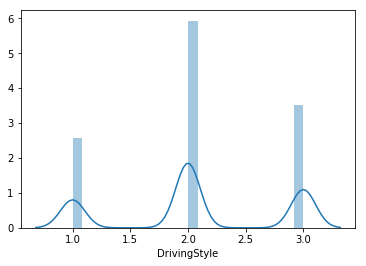

In [40]:
sns.distplot(alldata['DrivingStyle'])

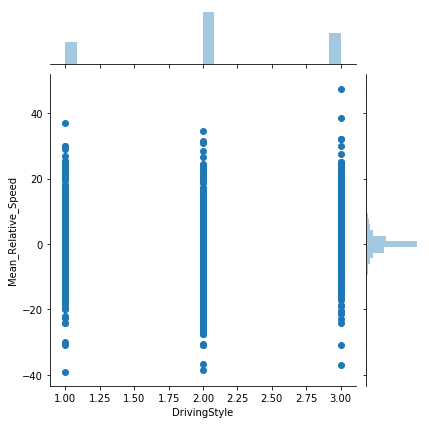

In [41]:
sns.jointplot(x=alldata['DrivingStyle'], y=alldata['Mean_Relative_Speed'])

In [201]:
#Lets split the feature variable and target variable.
X = np.asarray(alldata[['V2','V5','V6','V13','V14','V19','Avg_V11','V3_freq','V4_mean']])
y = np.asarray(alldata['DrivingStyle'])

In [202]:
X[190:205]

array([[5.50000000e+02, 2.66100000e+03, 2.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 5.06400000e+02, 4.00000000e-01,
        9.52000000e+01],
       [5.80000000e+02, 1.93900000e+03, 2.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 2.78600000e+02, 2.00000000e-01,
        9.40000000e+01],
       [5.63000000e+02, 2.18200000e+03, 2.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 1.19330000e+02, 0.00000000e+00,
        9.23333333e+01],
       [5.58000000e+02, 2.89300000e+03, 2.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 1.88440000e+02, 5.60000000e-01,
        8.76666667e+01],
       [5.51000000e+02, 1.26900000e+03, 2.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 6.94500000e+01, 9.00000000e-02,
        8.57272727e+01],
       [8.03000000e+02, 3.37300000e+03, 2.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 1.64170000e+02, 3.30000000e-01,
        7.9

In [203]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit(X).transform(X.astype(float))

In [204]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state =4)
print ('Train set:', X_train.shape, y_train.shape)
print ('Test set:', X_test.shape, y_test.shape)

Train set: (10395, 9) (10395,)
Test set: (2599, 9) (2599,)


In [205]:
X_train

array([[-0.86278582, -0.60079406, -0.77478682, ...,  0.22908039,
        -0.49755727,  0.0474501 ],
       [-0.82380874, -0.73293138, -0.77478682, ..., -0.74789707,
         0.14367845, -0.3278925 ],
       [ 1.26146459,  0.44752496,  0.43322613, ...,  1.00027985,
        -1.83346501,  0.83372813],
       ...,
       [-0.34013872, -0.52900205, -0.17078034, ..., -0.20307216,
         1.21240465,  0.0474501 ],
       [ 1.24197605,  1.91492709,  1.64123908, ..., -0.38680253,
         0.57116893, -1.39803074],
       [-0.9602285 , -0.66714055, -0.77478682, ..., -0.6419654 ,
         0.46429631, -0.21880278]])

In [206]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
lr = LogisticRegression(C=0.01, solver = 'liblinear').fit(X_train,y_train)
# C : Inverse of regularization strength; must be a positive float.
# solver : "liblinear" :Algorithm to use in the optimization problem.
#For small datasets, ‘liblinear’ is a good choice, whereas ‘sag’ and ‘saga’ are faster for large ones.

lr

c:\users\lenovo\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [207]:
y_hat = lr.predict(X_test)
y_hat

array([1, 1, 3, ..., 2, 2, 2], dtype=int64)

In [208]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test,y_hat)

0.5848403232012312

In [209]:
yhat_prob = lr.predict_proba(X_test)
yhat_prob

array([[0.44562357, 0.24524384, 0.30913259],
       [0.45984011, 0.25891529, 0.2812446 ],
       [0.37606272, 0.15121236, 0.47272492],
       ...,
       [0.35856855, 0.3591148 , 0.28231665],
       [0.10755962, 0.78225638, 0.110184  ],
       [0.31037171, 0.38775274, 0.30187555]])

In [210]:
from sklearn.metrics import log_loss
log_loss(y_test,yhat_prob)

0.842725871596181